In [105]:
import pandas as pd
import numpy as np

**DATA LOADING AND UNDERSTANDING**

In [106]:
df =pd.read_csv("/content/ipl_matches.csv")

In [107]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [108]:
df.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


**DATA CLEANING**

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [110]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [111]:
df.isnull().sum()

,0
id,0
Season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [112]:
Fillna = ["city", "winner", "player_of_match", "umpire1", "umpire2"]
for i in Fillna :
  df[i] = df[i].fillna(df[i].mode()[0])

In [113]:
df.isnull().sum().sum()

np.int64(637)

In [114]:
df.duplicated().sum()

np.int64(0)

In [115]:
df[['League', 'Year']] = df['Season'].str.split('-', expand=True)
df['Year'] = df['Year'].astype(int)

In [116]:
df = df.drop(["umpire3","League","Season","dl_applied"],axis = 1)

**CLEANED DATASET**

In [117]:
df.head()

,id,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Year
0,1,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,2017
1,2,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2017
2,3,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,2017
3,4,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,2017
4,5,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin,2017


In [118]:
from sklearn.preprocessing import LabelEncoder

In [119]:
le = LabelEncoder()
df['team1'] = le.fit_transform(df['team1'])
df['team2'] = le.fit_transform(df['team2'])

In [120]:
# Print mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)


{'Chennai Super Kings': np.int64(0), 'Deccan Chargers': np.int64(1), 'Delhi Capitals': np.int64(2), 'Delhi Daredevils': np.int64(3), 'Gujarat Lions': np.int64(4), 'Kings XI Punjab': np.int64(5), 'Kochi Tuskers Kerala': np.int64(6), 'Kolkata Knight Riders': np.int64(7), 'Mumbai Indians': np.int64(8), 'Pune Warriors': np.int64(9), 'Rajasthan Royals': np.int64(10), 'Rising Pune Supergiant': np.int64(11), 'Rising Pune Supergiants': np.int64(12), 'Royal Challengers Bangalore': np.int64(13), 'Sunrisers Hyderabad': np.int64(14)}


In [121]:
df_map = pd.DataFrame({
    'Original': le.classes_,
    'Encoded': le.transform(le.classes_)
})
print(df_map)

                       Original  Encoded
0           Chennai Super Kings        0
1               Deccan Chargers        1
2                Delhi Capitals        2
3              Delhi Daredevils        3
4                 Gujarat Lions        4
5               Kings XI Punjab        5
6          Kochi Tuskers Kerala        6
7         Kolkata Knight Riders        7
8                Mumbai Indians        8
9                 Pune Warriors        9
10             Rajasthan Royals       10
11       Rising Pune Supergiant       11
12      Rising Pune Supergiants       12
13  Royal Challengers Bangalore       13
14          Sunrisers Hyderabad       14


In [122]:
df['winner'] = le.fit_transform(df['winner'])

In [123]:
df['tossDecision'] = le.fit_transform(df['toss_decision'])

In [124]:
# Print mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)


{'bat': np.int64(0), 'field': np.int64(1)}


In [125]:
df.head()

,id,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Year,tossDecision
0,1,Hyderabad,05-04-2017,14,13,Royal Challengers Bangalore,field,normal,14,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,2017,1
1,2,Pune,06-04-2017,8,11,Rising Pune Supergiant,field,normal,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2017,1
2,3,Rajkot,07-04-2017,4,7,Kolkata Knight Riders,field,normal,7,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,2017,1
3,4,Indore,08-04-2017,11,5,Kings XI Punjab,field,normal,5,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,2017,1
4,5,Bangalore,08-04-2017,13,3,Royal Challengers Bangalore,bat,normal,13,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin,2017,0


**Exploratory Data Analysis**

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

#COUNT PLOT

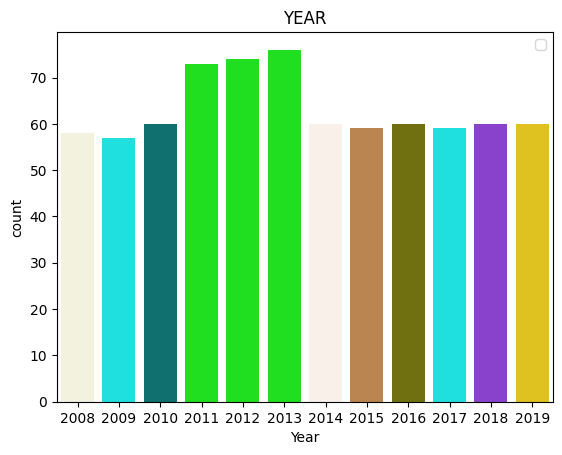

In [127]:
color =["beige","cyan","teal","lime","lime","lime","linen","peru","olive","aqua","blueviolet","gold"]
sns.countplot( x = "Year", data = df, hue = "Year",palette = color)
plt.title("YEAR")
plt.legend([])
plt.show()

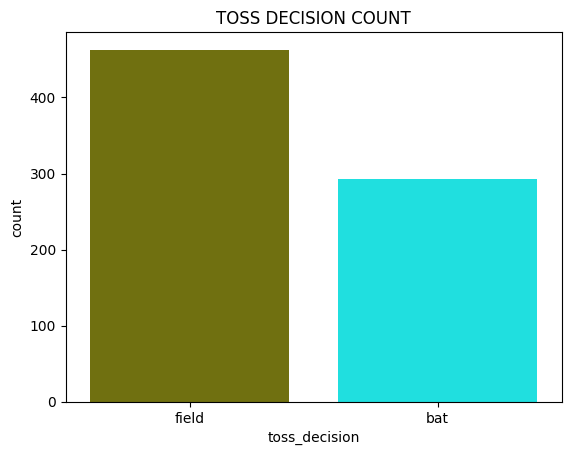

In [128]:
sns.countplot( x = "toss_decision",data = df , hue="toss_decision",palette=["Olive","aqua"])
plt.title("TOSS DECISION COUNT")
plt.show()

/tmp/ipython-input-4205839767.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="winner", data=df, order=df["winner"].value_counts().index, palette="magma")


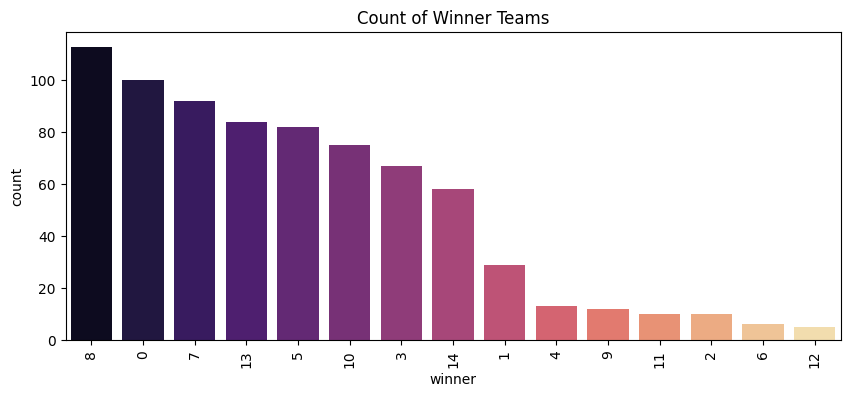

In [129]:
plt.figure(figsize=(10,4))
sns.countplot(x="winner", data=df, order=df["winner"].value_counts().index, palette="magma")
plt.xticks(rotation=90)
plt.title("Count of Winner Teams")
plt.show()

/tmp/ipython-input-918987786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="city", data=df, order=df["city"].value_counts().index, palette="inferno")


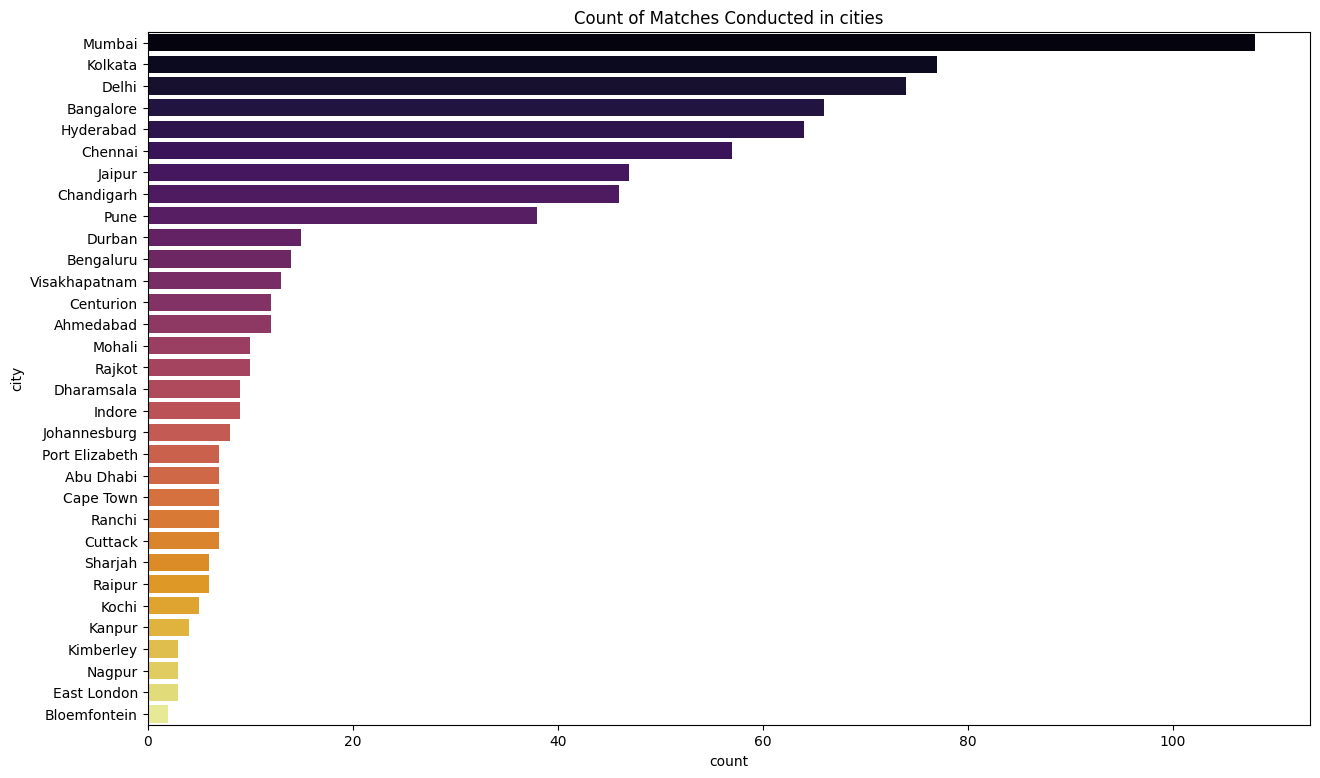

In [130]:
plt.figure(figsize=(15,9))
sns.countplot(y="city", data=df, order=df["city"].value_counts().index, palette="inferno")
plt.title("Count of Matches Conducted in cities")
plt.show()

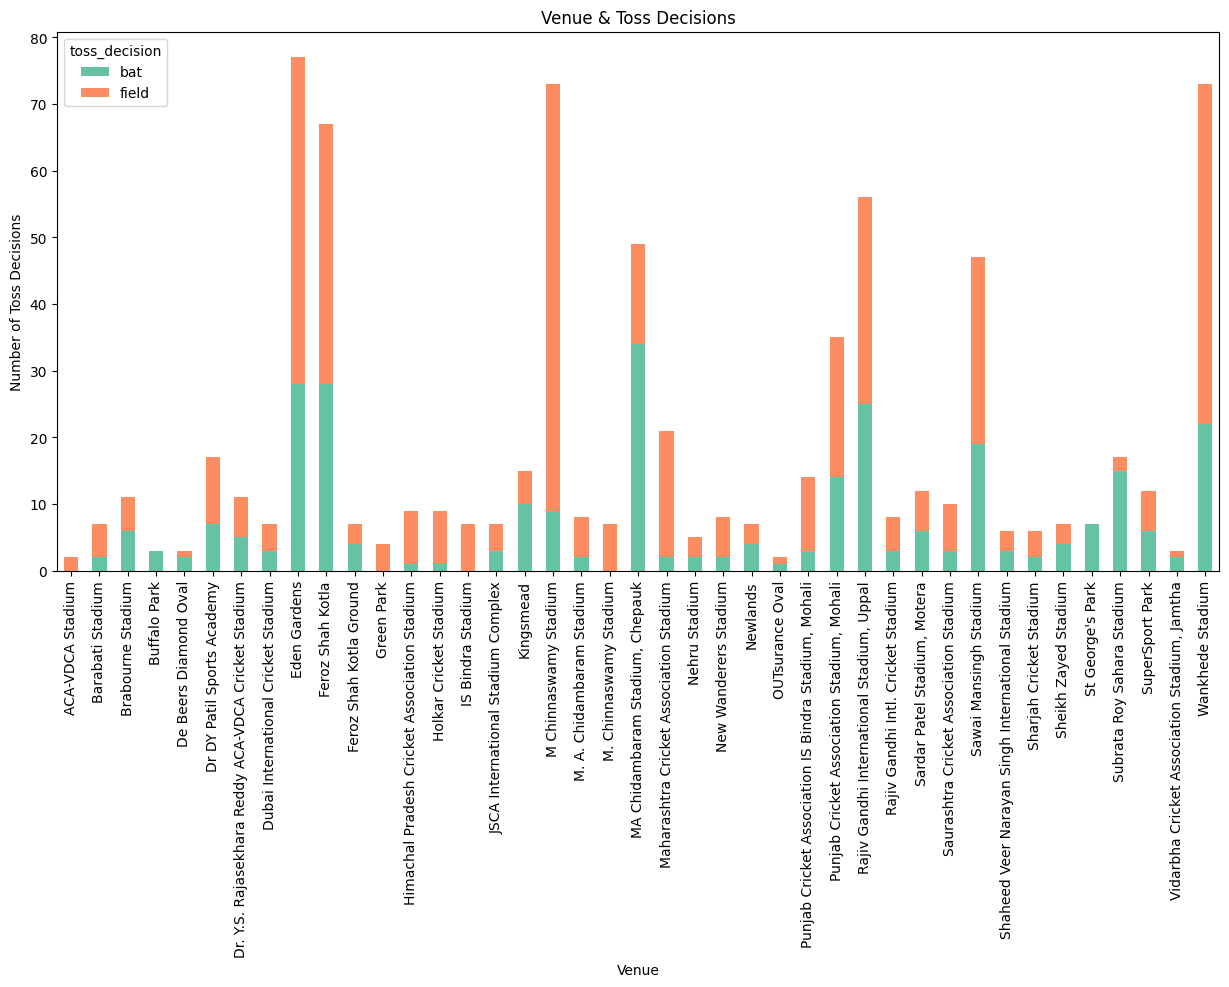

In [131]:
a= df.groupby('venue')['toss_decision'].value_counts().unstack().fillna(0)
a.plot(kind='bar',stacked=True,figsize=(15, 7),color=plt.cm.Set2.colors)
plt.title('Venue & Toss Decisions')
plt.xlabel('Venue')
plt.ylabel('Number of Toss Decisions')
plt.xticks(rotation=90)
plt.show()

#PIE CHART

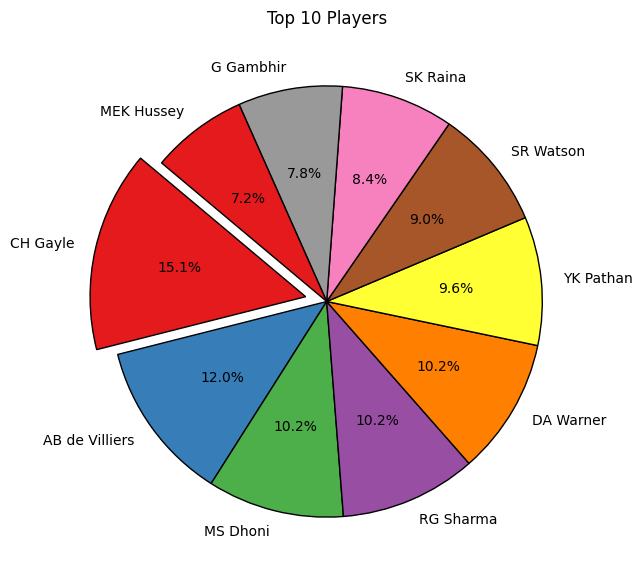

In [132]:
top_players = df["player_of_match"].value_counts().nlargest(10)
explode = [0.1 if i == 0 else 0 for i in range(len(top_players))]
plt.figure(figsize=(7,7))
plt.pie(top_players ,labels=top_players.index , autopct="%1.1f%%" , startangle=140 , explode=explode , colors = plt.cm.Set1.colors, wedgeprops={"edgecolor":"black"})
plt.title("Top 10 Players")
plt.show()

#HISTOGRAM

Numeric Columns: Index(['id', 'team1', 'team2', 'winner', 'win_by_runs', 'win_by_wickets',
       'Year', 'tossDecision'],
      dtype='object')


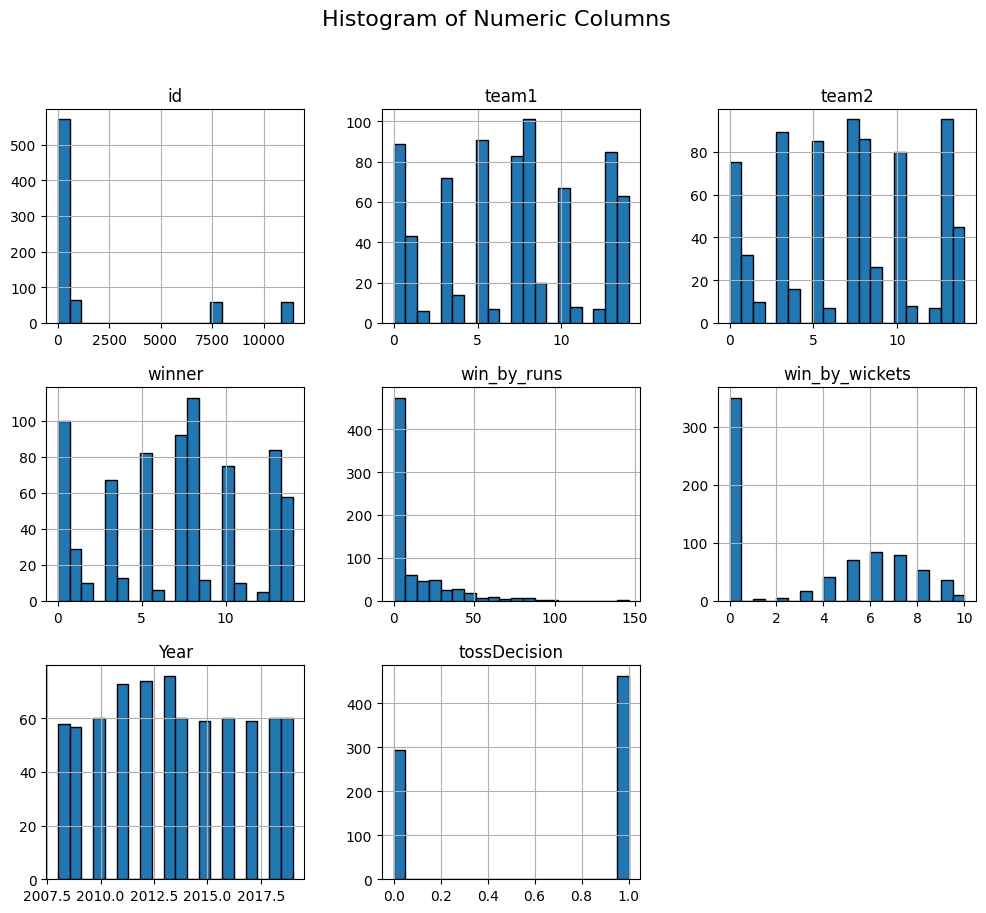

In [133]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
print("Numeric Columns:", num_cols)
df[num_cols].hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle("Histogram of Numeric Columns", fontsize=16)
plt.show()

#HEAT MAP

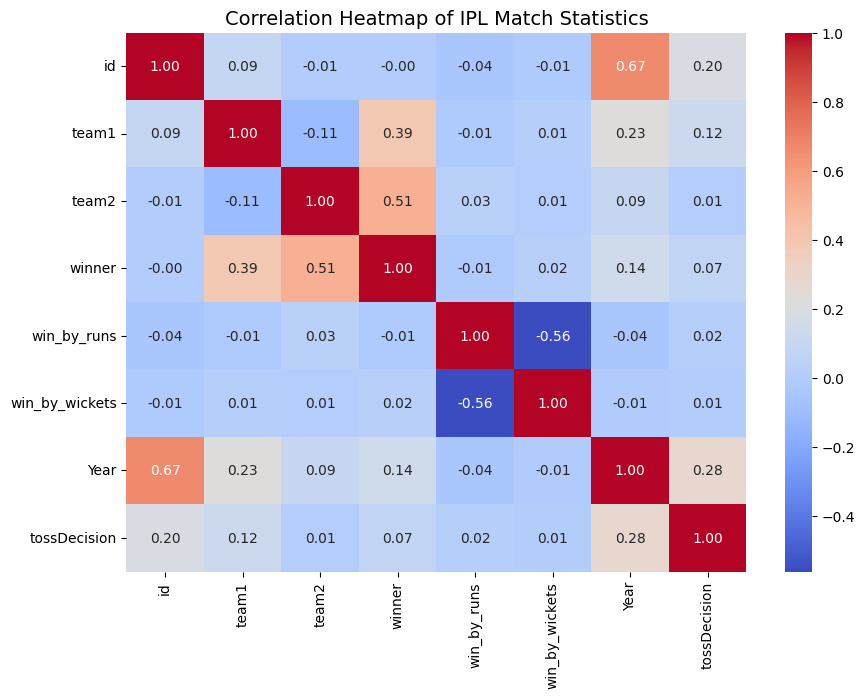

In [134]:
numeric = df.select_dtypes(include='number')
plt.figure(figsize=(10,7))
sns.heatmap(numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of IPL Match Statistics", fontsize=14)
plt.show()

#DATA PREPROCESSING

In [135]:
#DATA PREPROCESSING

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [137]:
X = df.drop(columns=['winner', 'id', 'date','umpire1','umpire2','player_of_match'])
y = df['winner']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42,stratify=y)
X_encoded = pd.get_dummies(X, drop_first=True)
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

#MODEL TRAINING

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,StratifiedGroupKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [139]:
Lr = LogisticRegression()
Lr.fit(X_train_scaled,y_train)
y_pred_Lr = Lr.predict(X_test_scaled)
print('accuracy :',accuracy_score(y_test,y_pred_Lr))
print('classification Report\n',classification_report(y_test,y_pred_Lr))

accuracy : 0.17763157894736842
classification Report
               precision    recall  f1-score   support

           0       1.00      0.05      0.10        20
           1       0.33      0.17      0.22         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         3
           5       0.33      0.06      0.11        16
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        19
           8       0.16      0.96      0.28        23
           9       0.00      0.00      0.00         2
          10       1.00      0.13      0.24        15
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        17
          14       0.00      0.00      0.00        12

    accuracy                           0.18       152
   macro avg       0.19   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [140]:
SVM = SVC()
SVM.fit(X_train_scaled, y_train)
y_pred = SVM.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.32894736842105265

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.30      0.43        20
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.14      0.08      0.10        13
           4       1.00      0.67      0.80         3
           5       0.42      0.31      0.36        16
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        19
           8       0.24      0.83      0.37        23
           9       0.00      0.00      0.00         2
          10       0.64      0.47      0.54        15
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         1
          13       0.10      0.12      0.11        17
          14       0.70      0.58      0.64        12

    accuracy                           0.33       152
   macro avg       0.33  

In [141]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred = KNN.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.4407894736842105

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.55      0.42        20
           1       0.33      0.33      0.33         6
           2       0.00      0.00      0.00         2
           3       0.27      0.23      0.25        13
           4       1.00      0.33      0.50         3
           5       0.33      0.31      0.32        16
           6       1.00      1.00      1.00         1
           7       0.54      0.68      0.60        19
           8       0.47      0.61      0.53        23
           9       0.00      0.00      0.00         2
          10       0.67      0.53      0.59        15
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         1
          13       0.50      0.12      0.19        17
          14       0.42      0.42      0.42        12

    accuracy                           0.44       152
   macro avg       0.46   

In [142]:
Decision_tree = DecisionTreeClassifier()
Decision_tree.fit(X_train_scaled, y_train)
y_pred = Decision_tree.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8552631578947368

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.67      0.80         6
           2       0.25      0.50      0.33         2
           3       0.64      0.69      0.67        13
           4       1.00      1.00      1.00         3
           5       0.81      0.81      0.81        16
           6       0.00      0.00      0.00         1
           7       1.00      0.95      0.97        19
           8       0.87      0.87      0.87        23
           9       1.00      1.00      1.00         2
          10       0.87      0.87      0.87        15
          11       0.50      1.00      0.67         2
          12       0.00      0.00      0.00         1
          13       0.88      0.82      0.85        17
          14       0.85      0.92      0.88        12

    accuracy                           0.86       152
   macro avg       0.71   

In [143]:
Randomforest = RandomForestClassifier()
Randomforest.fit(X_train_scaled, y_train)
y_pred = Randomforest.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.743421052631579

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.71      0.83      0.77         6
           2       0.50      0.50      0.50         2
           3       0.75      0.46      0.57        13
           4       1.00      0.67      0.80         3
           5       0.69      0.56      0.62        16
           6       0.00      0.00      0.00         1
           7       0.85      0.89      0.87        19
           8       0.59      0.87      0.70        23
           9       0.25      0.50      0.33         2
          10       0.93      0.87      0.90        15
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         1
          13       0.73      0.47      0.57        17
          14       0.73      0.92      0.81        12

    accuracy                           0.74       152
   macro avg       0.64    

In [145]:
XG_Boost = XGBClassifier()
XG_Boost.fit(X_train_scaled, y_train)
y_pred = XG_Boost.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9342105263157895

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      0.77      0.87        13
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00        19
           8       0.74      1.00      0.85        23
           9       1.00      1.00      1.00         2
          10       1.00      0.93      0.97        15
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.94      1.00      0.97        17
          14       0.92      0.92      0.92        12

    accuracy                           0.93       152
   macro avg       0.84   

#MODEL EVALUATION

In [147]:
models = [Lr,SVM,Decision_tree,Randomforest,XG_Boost]
cv =StratifiedGroupKFold(n_splits=5,shuffle=True,random_state=42)
results=[]
for model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    results.append({'Model': type(model).__name__, 'Accuracy': scores.mean(), 'Standard Deviation': scores.std()})
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Accuracy', ascending=False))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


                    Model  Accuracy  Standard Deviation
4           XGBClassifier  0.948733            0.024700
2  DecisionTreeClassifier  0.769752            0.099159
3  RandomForestClassifier  0.692052            0.014196
0      LogisticRegression  0.473471            0.033075
1                     SVC  0.451983            0.024186


#HYPERPARAMETER TUNING

In [148]:
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:24:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best CV Accuracy: 0.9635732229939412

Test Accuracy: 0.9539473684210527

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6
           2       1.00      0.50      0.67         2
           3       1.00      0.77      0.87        13
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00        19
           8       0.79      1.00      0.88        23
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00        15
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         1
          13       1.00     

In [149]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search.fit(X_train_scaled, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:25:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best CV Accuracy: 0.9602646831847363

Test Accuracy: 0.9539473684210527

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6
           2       1.00      0.50      0.67         2
           3       1.00      0.77      0.87        13
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00        19
           8       0.82      1.00      0.90        23
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00        15
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         1
          13       0.94   

#MODEL COMPARISON

In [151]:
team_mapping = {
    1: 'Chennai Super Kings',2: 'Delhi Capitals',3: 'Kolkata Knight Riders',4: 'Mumbai Indians',5: 'Kings XI Punjab',6: 'Rajasthan Royals',7: 'Royal Challengers Bangalore',8: 'Sunrisers Hyderabad',9: 'Gujarat Titans',
    10: 'Lucknow Super Giants',11: 'Deccan Chargers',12: 'Pune Warriors',13: 'Rising Pune Supergiant',14: 'Kochi Tuskers Kerala'}
new_match = {"Year": [2026],"city": [8],"team1": [1],"team2": [2],"toss_winner": [9],"toss_decision": [1],"result": [2],"win_by_runs": [35],"win_by_wickets": [0],"venue": [1]}
new_match_df = pd.DataFrame(new_match)
new_match_encoded = pd.get_dummies(new_match_df, drop_first=True)
new_match_encoded = new_match_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
new_match_scaled = scaler.transform(new_match_encoded)
y_proba = best_model.predict_proba(new_match_scaled)[0]
team1 = new_match['team1'][0]
team2 = new_match['team2'][0]
team_probabilities = {team1: y_proba[team1 - 1],team2: y_proba[team2 - 1]}
predicted_team_id = max(team_probabilities, key=team_probabilities.get)
predicted_team_name = team_mapping[predicted_team_id]
print("Predicted winner:", predicted_team_name)


Predicted winner: Delhi Capitals
